In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import profiledb as pdb

In [2]:
profiledb = pdb.load('profiledb.json')
print('Loaded {} experiments...'.format(len(profiledb.experiments)))

Loaded 164 experiments...


In [3]:
print('Configuration keys:', profiledb.confkeys())
print('Input files:', profiledb.confvalues('input1'))
print('Plugins:', profiledb.confvalues('plugins'))
print('Iterations:', profiledb.confvalues('iterations'))
print('Tags: ', profiledb.tags())

('Configuration keys:', set([u'input2', u'sample', u'input1', u'iterations', u'plugins']))
('Input files:', set([u'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_20pc.nt', u'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_10pc.nt', u'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_1pc.nt']))
('Plugins:', set([u'java,java-graph', u'spark,java-conversions,java-graph', u'spark,spark-graph', u'java,graphchi', u'spark,java-conversions,graphchi', u'java,basic-graph', u'spark,basic-graph']))
('Iterations:', set([1, 10, 20, 5]))
('Tags: ', set([u'2016-08-12-a-crocopr']))


In [4]:
styles = ['-', '--', '-.', ':', ',', '.', 'o', 'v', '^', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plugins = profiledb.confvalues('plugins')
plugin2style = dict(zip(plugins, styles))
plugin2color = dict(zip(plugins, colors))
files = profiledb.confvalues('input1')
file2color = dict(zip(files, colors))

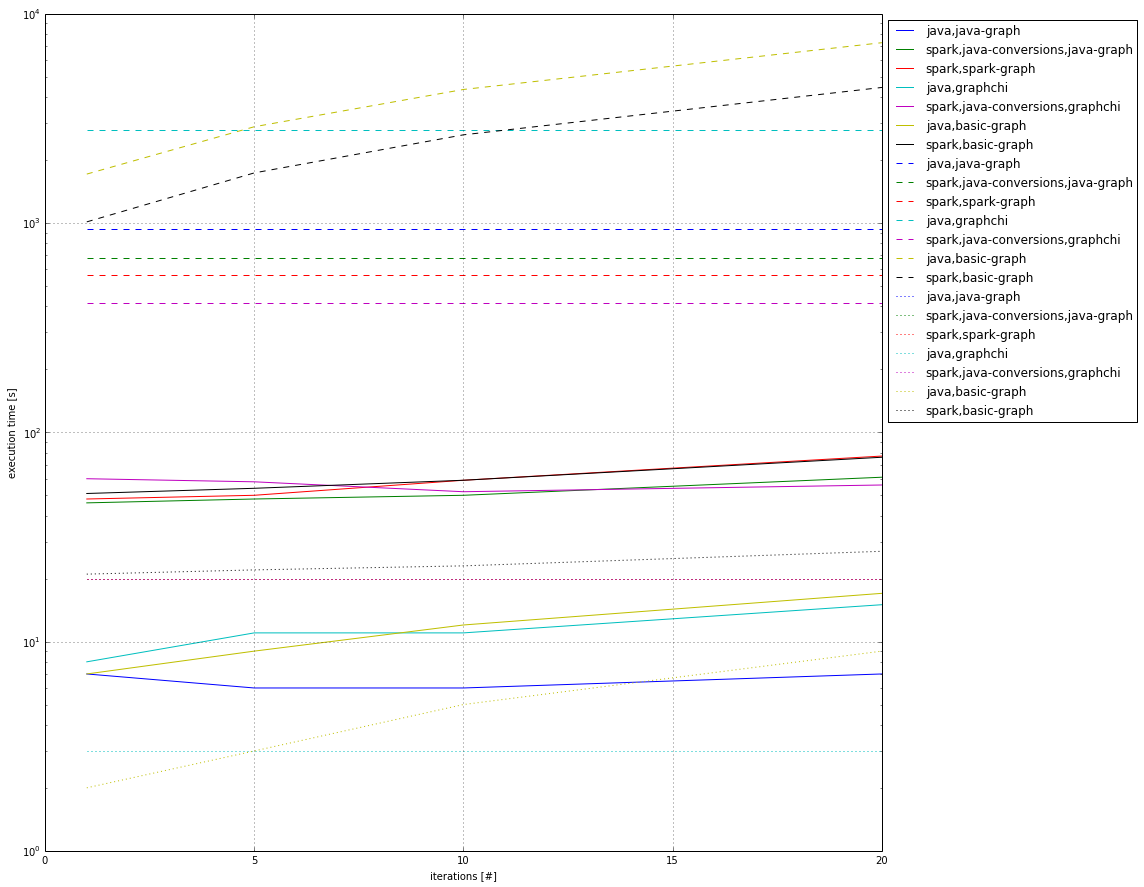

In [5]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return exp.conf('iterations')
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and exp.conf('input1') == u'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_1pc.nt'

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Execution'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (lower)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (upper)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (15, 15))
for series in iteract:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], label = str(series[0]))
for series in iterhi:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = '--', label = str(series[0]))
for series in iterlo:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = ':', label = str(series[0]))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

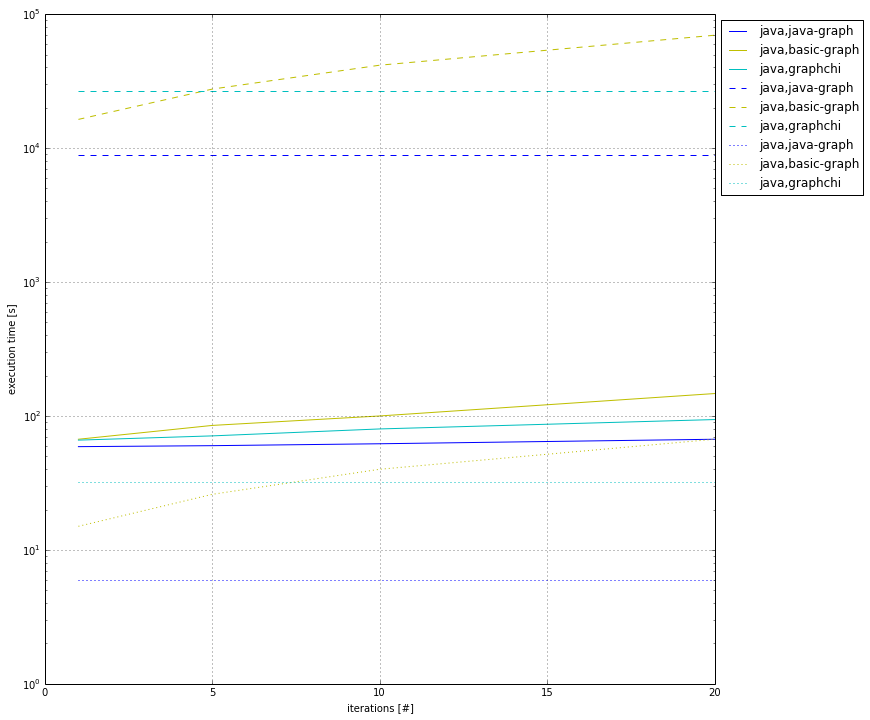

In [7]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return exp.conf('iterations')
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and \
    exp.conf('input1') == u'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_10pc.nt'

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Execution'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (lower)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (upper)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (12, 12))
for series in iteract:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], label = str(series[0]))
for series in iterhi:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = '--', label = str(series[0]))
for series in iterlo:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = ':', label = str(series[0]))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

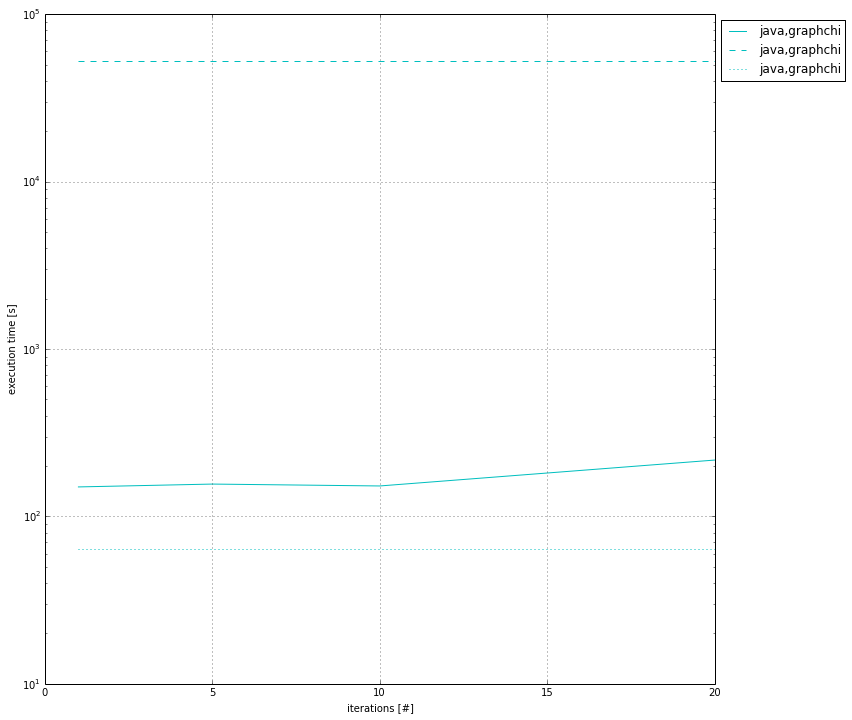

In [8]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return exp.conf('iterations')
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and \
    exp.conf('input1') == u'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_20pc.nt'

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Execution'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (lower)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (upper)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (12, 12))
for series in iteract:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], label = str(series[0]))
for series in iterhi:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = '--', label = str(series[0]))
for series in iterlo:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = ':', label = str(series[0]))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

In [9]:
filesizes = {'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_1pc.nt': 33.4,\
            'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_5pc.nt': 167.,\
            'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_10pc.nt': 334.2,\
            'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_20pc.nt': 668.2,\
            'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_50pc.nt': 1.63 * 1024,\
            'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.nt': 3.26 * 1024 }

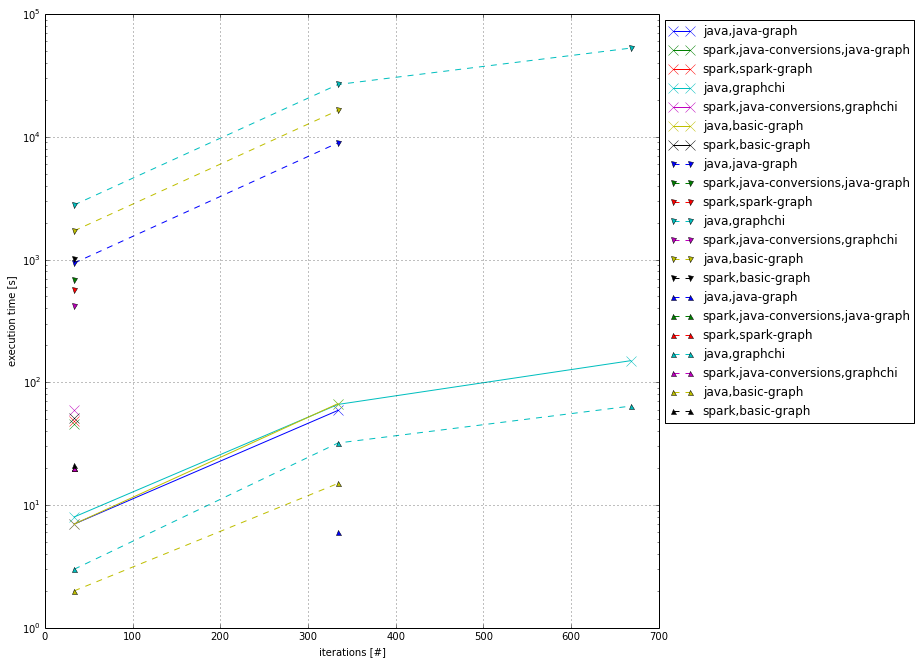

In [10]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return filesizes[exp.conf('input1')]
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and exp.conf('iterations') == 1

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Execution'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (lower)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (upper)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (11, 11))
for series in iteract:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], marker = 'x', markersize = 10, label = str(series[0]))
for series in iterhi:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = '--', marker = 'v', markersize = 5, label = str(series[0]))
for series in iterlo:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = '--', marker = '^', markersize = 5, label = str(series[0]))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

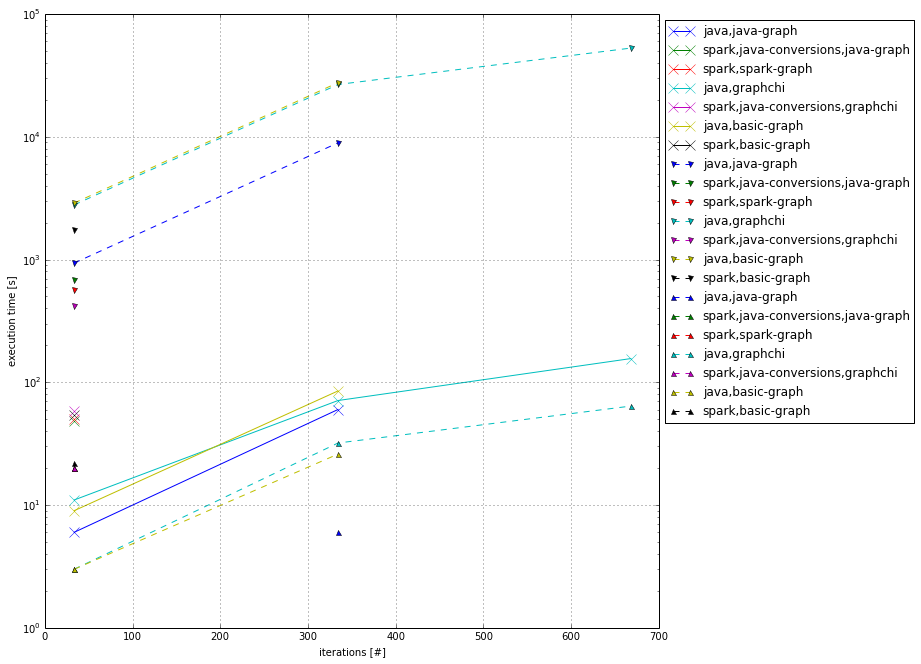

In [11]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return filesizes[exp.conf('input1')]
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and exp.conf('iterations') == 5

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Execution'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (lower)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (upper)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (11, 11))
for series in iteract:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], marker = 'x', markersize = 10, label = str(series[0]))
for series in iterhi:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = '--', marker = 'v', markersize = 5, label = str(series[0]))
for series in iterlo:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = '--', marker = '^', markersize = 5, label = str(series[0]))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

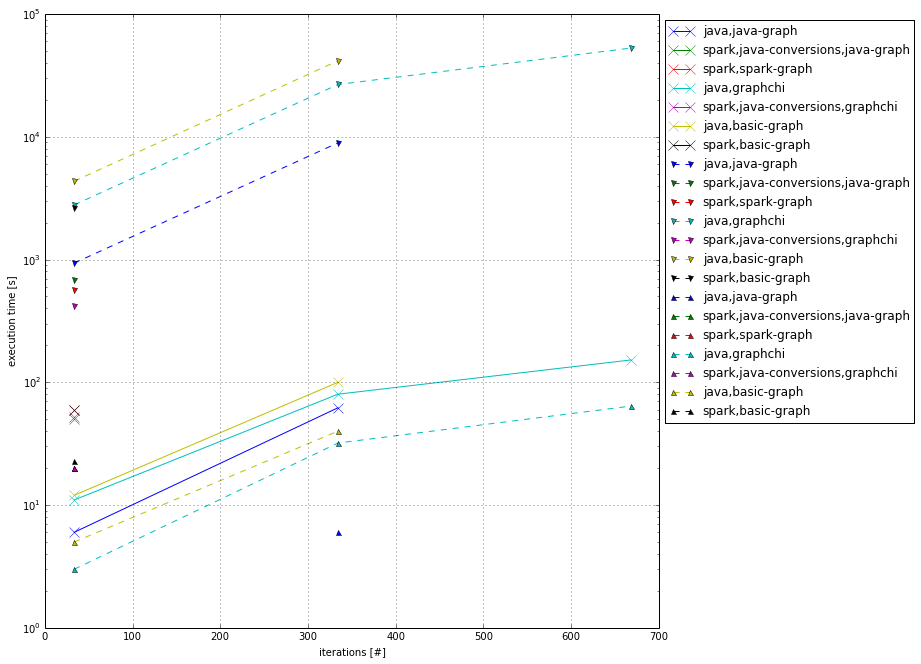

In [12]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return filesizes[exp.conf('input1')]
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and exp.conf('iterations') == 10

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Execution'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (lower)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (upper)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (11, 11))
for series in iteract:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], marker = 'x', markersize = 10, label = str(series[0]))
for series in iterhi:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = '--', marker = 'v', markersize = 5, label = str(series[0]))
for series in iterlo:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = '--', marker = '^', markersize = 5, label = str(series[0]))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

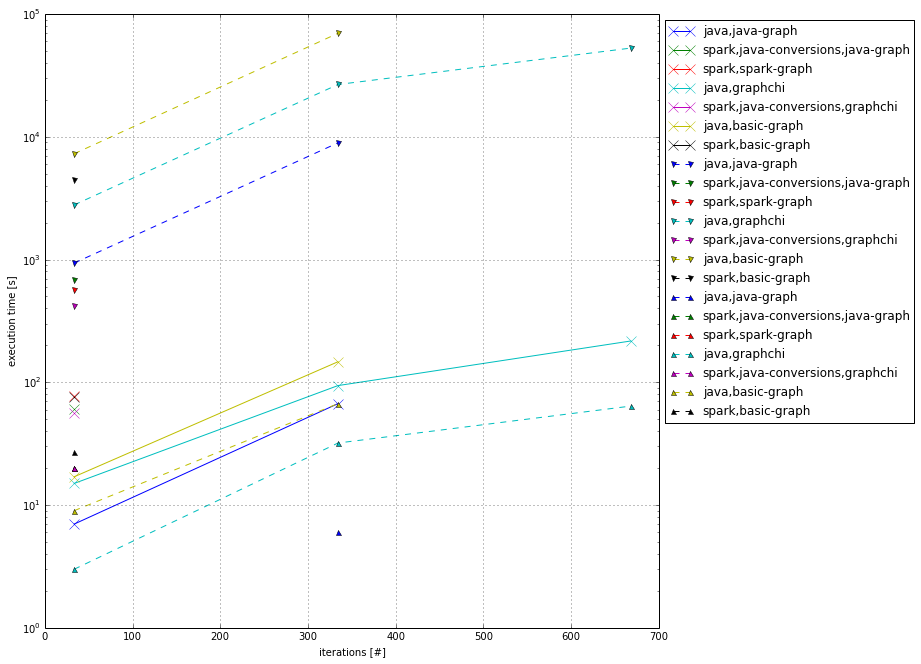

In [13]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return filesizes[exp.conf('input1')]
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and exp.conf('iterations') == 20

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Execution'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (lower)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement(['Estimate 1 (upper)'])['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (11, 11))
for series in iteract:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], marker = 'x', markersize = 10, label = str(series[0]))
for series in iterhi:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = '--', marker = 'v', markersize = 5, label = str(series[0]))
for series in iterlo:
    plt.plot(series[1].x, series[1].y, color = plugin2color[series[0]], linestyle = '--', marker = '^', markersize = 5, label = str(series[0]))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)